<a href="https://colab.research.google.com/github/MurtazaMister/ML/blob/master/ML_Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn

In [2]:
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58],
                   [102, 43, 37],[69, 96, 70], [73, 67, 43],
                   [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69,96, 70], [73, 67, 43], [91, 88, 64]], dtype='float32')

targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], 
                    [103, 119],[56, 70], [81, 101], [119, 133], 
                    [22, 37], [103, 119],[56, 70], [81, 101]],dtype='float32')

inputs, targets

(array([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.]], dtype=float32), array([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.]], dtype=float32))

In [3]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

inputs, targets

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.],
         [ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.],
         [ 73.,  67.,  43.],
         [ 91.,  88.,  64.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.],
         [ 22.,  37.],
         [103., 119.],
         [ 56.,  70.],
         [ 81., 101.],
         [119., 133.],
         [ 22.,  37.],
         [103., 119.],
         [ 56.,  70.],
         [ 81., 101.]]))

In [4]:
# Import tensor dataset and data loader
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

In [5]:
# Define dataset
dataset = TensorDataset(inputs,targets)
dataset[0]

(tensor([73., 67., 43.]), tensor([56., 70.]))

In [6]:
# Define data loader
dataloader = DataLoader(dataset,batch_size=15, shuffle=True)

In [7]:
# Define a model using nn.Linear
# Initializing weights and biases - nn.Linear

model = nn.Linear(in_features=3, out_features=2, bias=True)

In [8]:
# Manipulating the weights and biases - optimizer - optim.SGD
optimizer = torch.optim.SGD(model.parameters(), 0.0001)

In [9]:
# Loss function - torch.nn.functional.mse_loss
loss_fn = F.mse_loss

In [10]:
def fit(num_epochs:int, model, loss_fn, optimizer):
  losses = []
  for epoch in range(num_epochs):
    batch = 0
    for xb,yb in dataloader:
      batch += 1
      pred = model(xb)
      loss = loss_fn(pred, yb)
      losses.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # print('epoch {} batch {} batch size {} loss {}'.format(epoch,batch,len(xb),loss.item()))
  return losses

In [11]:
fit(1000, model, loss_fn, optimizer)

[16441.615234375,
 9620.2138671875,
 5696.513671875,
 3432.546630859375,
 2119.97021484375,
 1353.4073486328125,
 900.794189453125,
 629.2230224609375,
 462.5186767578125,
 356.9732360839844,
 287.4637145996094,
 239.51051330566406,
 204.73316955566406,
 178.250244140625,
 157.19078063964844,
 139.84181213378906,
 125.16064453125,
 112.49395751953125,
 101.41741180419922,
 91.64273071289062,
 82.9643325805664,
 75.2281265258789,
 68.3132095336914,
 62.12119674682617,
 56.56947708129883,
 51.58736038208008,
 47.11329650878906,
 43.093196868896484,
 39.47922897338867,
 36.22883605957031,
 33.30415725708008,
 30.67130470275879,
 28.300031661987305,
 26.16324806213379,
 24.236730575561523,
 22.49876594543457,
 20.929868698120117,
 19.512693405151367,
 18.2315616607666,
 17.072568893432617,
 16.02309226989746,
 15.071998596191406,
 14.209136962890625,
 13.425537109375,
 12.71313762664795,
 12.064629554748535,
 11.473605155944824,
 10.93418025970459,
 10.441189765930176,
 9.989934921264648,


In [12]:
new_data = torch.Tensor([[87, 134, 58], [102, 43, 37], [69, 96,70]])
new_targets = torch.Tensor([[119, 133], [22, 37], [103, 119]])
pred_new_data = model(new_data)
print("Predict (after training): ",new_targets,"\n", pred_new_data)

Predict (after training):  tensor([[119., 133.],
        [ 22.,  37.],
        [103., 119.]]) 
 tensor([[118.6313, 132.9566],
        [ 20.8765,  37.0235],
        [101.6628, 119.1607]], grad_fn=<AddmmBackward0>)


# Estimating the values of weights and biases

In [13]:
inputs = np.array([[73, 67, 43],
[91, 88, 64],
[87, 134, 58],[102, 43, 37],
[69, 96, 70]], dtype='float32')

targets = np.array([[56],
[81],
[119],
[22],
[103]], dtype='float32')

In [14]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [15]:
dataset = TensorDataset(inputs,targets)

In [16]:
dataloader = DataLoader(dataset,batch_size=1, shuffle=True)

In [17]:
model = nn.Sequential(
    nn.Linear(in_features = 3, out_features = 1, bias=True)
)
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0000001)

print(model[0].weight), print(model[0].bias)
losses = fit(1000, model, loss_function, optimizer)
# model[0].weight, model[0].bias

Parameter containing:
tensor([[ 0.0614, -0.1672,  0.0149]], requires_grad=True)
Parameter containing:
tensor([0.4659], requires_grad=True)


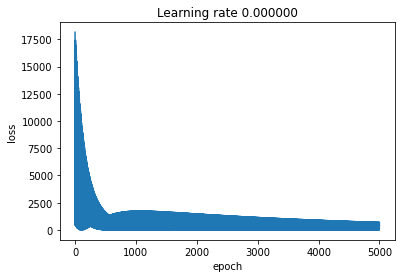

In [18]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(0.0000001))
plt.show()

In [19]:
output = model(torch.Tensor([70, 34, 45]))
output

tensor([42.8671], grad_fn=<AddBackward0>)